In [1]:
import torch
import torch.nn.functional as F
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from utils.model import *
from utils.dataprovider import DataProvider
from utils.encoder import encode_data
from config import config

import os

In [2]:
# Model Loading
model_name = config['model_name']
model = model_map[model_name]
model_path = os.path.join(config["chkp_path"], config["chkp_name"]+'-'+config["Test"]["chkp_prefix"]+'.pt')
model.load_state_dict(torch.load(model_path))
model.eval()

# Data Loading
data_provider = DataProvider(
    epi_path=config['Data']['test_path'],
    epi_args=config['Data']['test_args'],
    hla_path=config['Data']['hla_path'],
    hla_args=config['Data']['hla_args'],
    )
x, y = encode_data(data_provider)

x = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)
print(f"Samples in test set: {len(x)}")

# Prediction
with torch.no_grad():
    y_pred = model(x).numpy()

Number of HLA alleles: 7044
Number of samples: 102180
Samples in test set: 102180


ROC curve saved as 'roc_curve.png'


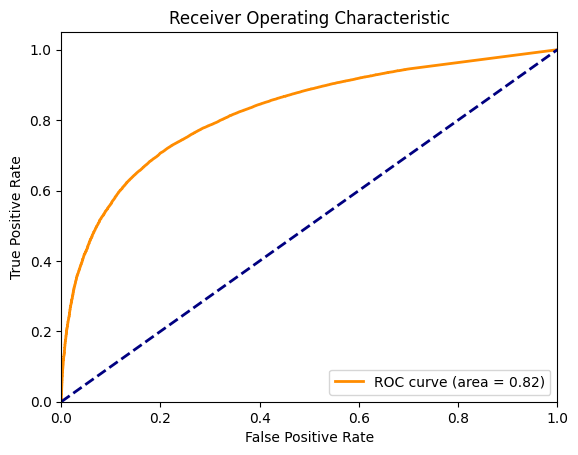

In [3]:
# ROC curve
fpr, tpr, _ = roc_curve(y.numpy(), y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
# plt.savefig('roc_curve.png')
print("ROC curve saved as 'roc_curve.png'")